In [288]:
import numpy as np
import pandas as pd

In [305]:
df = pd.read_csv("C:\\Users\\İdris Aydın\\Desktop\\kc_house_data.csv")

In [306]:
df.head(3)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062


In [307]:
df.tail(3)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287
21612,1523300157,20141015T000000,325000.0,2,0.75,1020,1076,2.0,0,0,...,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357


In [308]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

## Missing Data Check

In [309]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

## Deleting unnecessary columns

In [310]:
df = df.drop(columns = ['id', 'date', 'yr_built', 'yr_renovated', 'zipcode', 'sqft_lot15'])

In [311]:
df.head(3)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,lat,long,sqft_living15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,47.5112,-122.257,1340
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,47.7210,-122.319,1690
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,47.7379,-122.233,2720


## Importing required libraries

In [332]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [333]:
X = df.drop(columns = ['price'])
y = df['price']

## Splitting into training and test sets

In [334]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

## Preprocessing

In [335]:
scaler = StandardScaler()

In [336]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Creating Model

In [337]:
model = LinearRegression()

In [338]:
model.fit(X_train, y_train)

LinearRegression()

## Model Estimation

In [339]:
model_score = model.score(X_test, y_test)
print(f"Model Score is {model_score}")

Model Score is 0.6830847508607687


## Model Prediction

In [341]:
prediction = model.predict(X_test)

In [342]:
mse = mean_squared_error(y_test, prediction)
mae = mean_absolute_error(y_test, prediction)
r2 = r2_score(y_test, prediction)

print(f"Mean Squared Error:{mse}")
print(f"Mean Absolute Error:{mae}")
print(f"R^2 Score:{r2}")

Mean Squared Error:47406599229.15529
Mean Absolute Error:132771.61248292646
R^2 Score:0.6830847508607687


## Model Visualization

In [345]:
import matplotlib.pyplot as plt

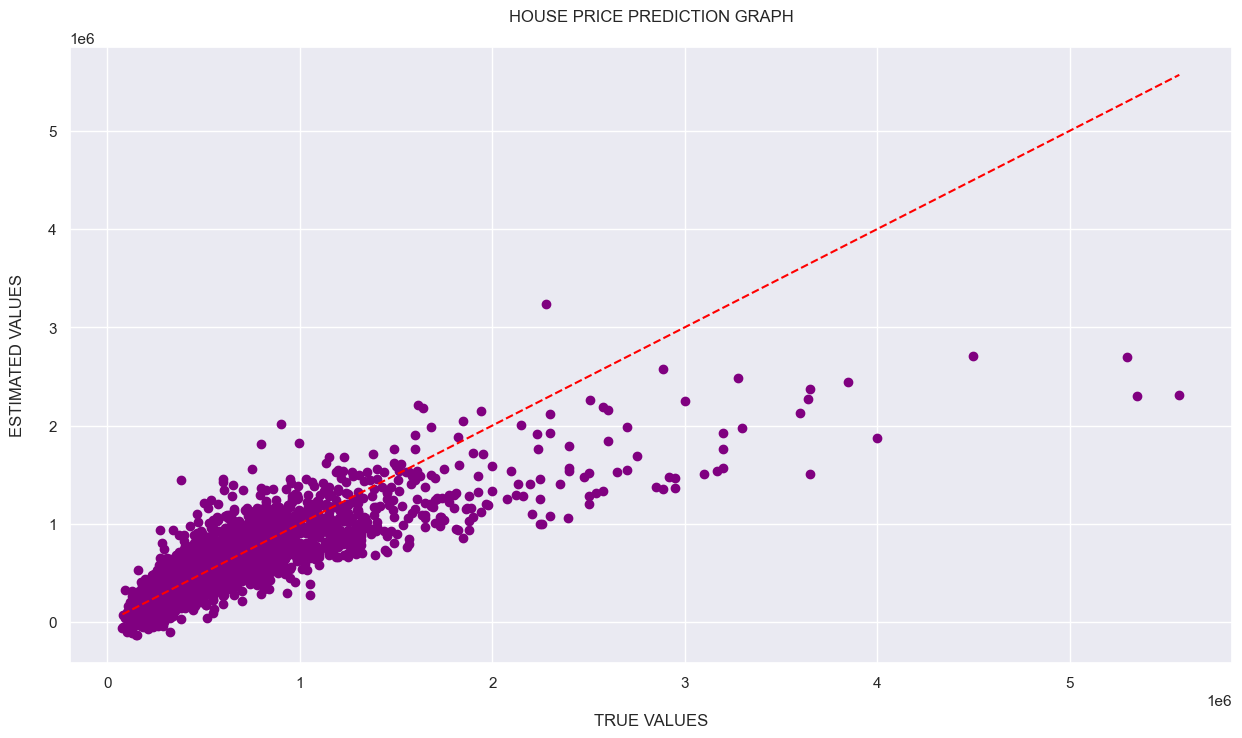

In [354]:
plt.figure(figsize = (15, 8))

plt.scatter(y_test, prediction, color = 'purple', label = 'Predictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Perfect Fit')
plt.xlabel("\nTRUE VALUES")
plt.ylabel("ESTIMATED VALUES\n")
plt.title("HOUSE PRICE PREDICTION GRAPH\n")

plt.show()